<a href="https://colab.research.google.com/github/agustinsilva447/CDL/blob/master/mnist_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
#función para graficar el accuracy en función de la cantidad de epochs
def plot_accuracy_and_loss(history):
	plt.plot(history.history['accuracy'], label='accuracy')
	plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
	plt.xlabel('Epoch')
	plt.ylabel('Accuracy')
	plt.ylim([0.5, 1])
	plt.legend(loc='lower right')

In [0]:
#cargando el dataset MNIST desde keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#normalizando los valores de los pixels para que estén entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
# Todas estas son la posibles variables que se pueden autoconfigurar
# sin embargo, solo vamos a trabajar con 3 para que las simulaciones
# no lleven tanto tiempo. Vamos a trabajar con una red neuronal 
# con 2 hidden layers y optimizada utilizando stochastic gradient descent. 
# Vamos a tunear 3 parámetros: el learning rate, la cantidad de neuronas 
# por hidden layer y la cantidad de epochs.
hidden_units_ = [5, 10, 15]
hidden_layers_ = [1, 2, 3]
solver_ = ['sgd', 'adam']
lr_ = [0.001, 0.01, 0.1]
#evaluamos 54 casos
epochs_ = 10
batch_size_ = 32
momentum_ = 0.9	
nesterov_ = True

In [0]:
#inicialización de algunas variables
test_loss = [0] * (len(hidden_units_) * len(hidden_layers_) * len(solver_) * len(lr_))
test_acc =  [0] * (len(hidden_units_) * len(hidden_layers_) * len(solver_) * len(lr_))
caso = 0
max_acc = 0

In [0]:
# Barremos con los distintos valores de neuronas (3), epochs (2) 
# y learning rate (3). Para cada caso calculamos la accuracy y 
# nos quedamos con el caso con el valor más alto
for i in range(len(hidden_units_)):
  for j in range(len(hidden_layers_)):
    for k in range(len(lr_)):
      for l in range(len(solver_)):
        
        if hidden_layers_[j] == 1:        
          model = Sequential([
          layers.Flatten(input_shape=(28, 28)),        
          layers.Dense(hidden_units_[i], activation='relu'),        
          layers.Dense(10, activation='softmax')
          ])
        if hidden_layers_[j] == 2:        
          model = Sequential([
          layers.Flatten(input_shape=(28, 28)),        
          layers.Dense(hidden_units_[i], activation='relu'),
          layers.Dense(hidden_units_[i], activation='relu'),        
          layers.Dense(10, activation='softmax')
          ])
        if hidden_layers_[j] == 3:        
          model = Sequential([
          layers.Flatten(input_shape=(28, 28)),        
          layers.Dense(hidden_units_[i], activation='relu'),
          layers.Dense(hidden_units_[i], activation='relu'),
          layers.Dense(hidden_units_[i], activation='relu'),        
          layers.Dense(10, activation='softmax')
          ])
        
        if solver_[l] == 'sgd':
          optimizer = optimizers.SGD(lr=lr_[k], momentum = momentum_, nesterov=nesterov_)     
          model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
          history = model.fit(x_train, y_train, epochs=epochs_, verbose=0, batch_size=batch_size_, validation_data=(x_test, y_test))
          test_loss[caso], test_acc[caso] = model.evaluate(x_test, y_test, verbose=0)  
          if test_acc[caso]>max_acc:
            max_acc = test_acc[caso]
            neu_opt = hidden_units_[i]
            lay_opt = hidden_layers_[j]
            lra_opt = lr_[k]
            sol_opt = solver_[l]
            hist_opt = history

        if solver_[l] == 'adam':
          optimizer = optimizers.Adam(lr=lr_[k])
          model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
          history = model.fit(x_train, y_train, epochs=epochs_, verbose=0, batch_size=batch_size_, validation_data=(x_test, y_test))
          test_loss[caso], test_acc[caso] = model.evaluate(x_test, y_test, verbose=0)  
          if test_acc[caso]>max_acc:
            max_acc = test_acc[caso]
            neu_opt = hidden_units_[i]
            lay_opt = hidden_layers_[j]
            lra_opt = lr_[k]
            sol_opt = solver_[l]
            hist_opt = history
        print("Para el caso número",caso,"el accuracy es igual a",test_acc[caso])
        caso += 1

Para el caso número 0 el accuracy es igual a 0.8690999746322632
Para el caso número 1 el accuracy es igual a 0.8974000215530396
Para el caso número 2 el accuracy es igual a 0.9003999829292297
Para el caso número 3 el accuracy es igual a 0.6608999967575073
Para el caso número 4 el accuracy es igual a 0.8032000064849854
Para el caso número 5 el accuracy es igual a 0.17679999768733978
Para el caso número 6 el accuracy es igual a 0.866599977016449
Para el caso número 7 el accuracy es igual a 0.8725000023841858
Para el caso número 8 el accuracy es igual a 0.8769999742507935
Para el caso número 9 el accuracy es igual a 0.6643999814987183
Para el caso número 10 el accuracy es igual a 0.2912999987602234
Para el caso número 11 el accuracy es igual a 0.20759999752044678
Para el caso número 12 el accuracy es igual a 0.8557000160217285
Para el caso número 13 el accuracy es igual a 0.8590999841690063
Para el caso número 14 el accuracy es igual a 0.8781999945640564
Para el caso número 15 el accuracy

In [0]:
#mostrar resumen de todos los resultados y finalmente el caso óptimo
caso = 0
for i in range(len(hidden_units_)):
	for j in range(len(hidden_layers_)):
		for k in range(len(lr_)):
			for l in range(len(solver_)):
				print("Cantidad de layers",hidden_layers_[j],". Cantidad de neuronas", hidden_units_[i],". Solver:",solver_[l],". Learning rate:", lr_[k],". Accuracy:", test_acc[caso])
				caso += 1				
print("---------------------------------------------")
print("El Accuracy máximo es:",max_acc,". Para el caso con",lay_opt," layers,",neu_opt,"cantidad de neuronas, ",sol_opt," y un learning rate de",lra_opt)

Cantidad de layers 1 . Cantidad de neuronas 5 . Solver: sgd . Learning rate: 0.001 . Accuracy: 0.8690999746322632
Cantidad de layers 1 . Cantidad de neuronas 5 . Solver: adam . Learning rate: 0.001 . Accuracy: 0.8974000215530396
Cantidad de layers 1 . Cantidad de neuronas 5 . Solver: sgd . Learning rate: 0.01 . Accuracy: 0.9003999829292297
Cantidad de layers 1 . Cantidad de neuronas 5 . Solver: adam . Learning rate: 0.01 . Accuracy: 0.6608999967575073
Cantidad de layers 1 . Cantidad de neuronas 5 . Solver: sgd . Learning rate: 0.1 . Accuracy: 0.8032000064849854
Cantidad de layers 1 . Cantidad de neuronas 5 . Solver: adam . Learning rate: 0.1 . Accuracy: 0.17679999768733978
Cantidad de layers 2 . Cantidad de neuronas 5 . Solver: sgd . Learning rate: 0.001 . Accuracy: 0.866599977016449
Cantidad de layers 2 . Cantidad de neuronas 5 . Solver: adam . Learning rate: 0.001 . Accuracy: 0.8725000023841858
Cantidad de layers 2 . Cantidad de neuronas 5 . Solver: sgd . Learning rate: 0.01 . Accura

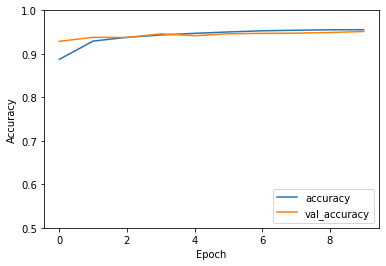

In [0]:
plot_accuracy_and_loss(hist_opt)